> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# No Show Appointments Analysis

<a id='intro'></a>
## Introduction
 **Purpose** To perform a Data analysis on a sample Dataset of No-show Appointments

This Dataset contains the records of the patients with various types of diseases who booked appointments and did not showed up on their appointment Day.

## Questions

### What factors made people to miss their Appointments ?
1. How many Female and male in the Dataset missed the Appointments ?

2. Did the Age, regardless of Age and sex, determine the patients missing the Appointments ?

3. Did the Types of Disease affect the attendence of the Appointments ?

4. Did the Scholarship of the patients helped in the attendence of their appointments?

<a id='wrangling'></a>
## Data Wrangling


In [1]:
# Render plots inline
%matplotlib inline


# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all graphs
sns.set_style('dark')

# Read in the Dataset, creat dataframe
appointment_data = pd.read_csv('noshow.csv')

In [2]:
# Print the first few records to review data and format
appointment_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Print the Last few records to review data and format
appointment_data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


**Note** PatientId column have exponential values in it.
**Note** No-show displays No if the patient visited and Yes if the Patient did not visited.

## Data Cleanup
From the data description and questions to answer, I've determined that some of the dataset columns are not necessary for the analysis process and will therefore be removed. This will help to process the Data Analysis Faster.

- PatientId
- ScheduledDay
- Sms_received
- AppointmentID
- AppointmentDay

i'll take a 3 step approach to data cleanup

1. Identify and remove duplicate entries
2. Remove unnecessary columns
3. Fix missing and data format issues

Step 1 - Removing Duplicate entries
Concluded that no duplicates entries exists, based on the tests below

In [4]:
# Identify and remove duplicate entries
appointment_data_duplicates = appointment_data.duplicated()
print 'Number of duplicate entries is/are {}'.format(appointment_data_duplicates.sum())

Number of duplicate entries is/are 0


In [5]:
# Lets make sure that this is working
duplication_test = appointment_data.duplicated('Age').head()
print 'Number of entries with duplicate age in top entries are {}'.format(duplication_test.sum())
appointment_data.head()

Number of entries with duplicate age in top entries are 2


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Step 2 - Remove unnecessary columns**

Columns(PatientId, ScheduledDay, Sms_received, AppointmentID, AppointmentDay) removed

In [6]:
# Create new dataset without unwanted columns
clean_appointment_data = appointment_data.drop(['PatientId','ScheduledDay','SMS_received','AppointmentID','AppointmentDay'], axis=1)
clean_appointment_data.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,No


**Step 3 - Fix any missing or data format issues**
Concluded that there is no missing data

In [7]:
# Calculate number of missing values
clean_appointment_data.isnull().sum()

Gender           0
Age              0
Neighbourhood    0
Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
Handcap          0
No-show          0
dtype: int64

In [8]:
# Taking a look at the datatypes
clean_appointment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
Gender           110527 non-null object
Age              110527 non-null int64
Neighbourhood    110527 non-null object
Scholarship      110527 non-null int64
Hipertension     110527 non-null int64
Diabetes         110527 non-null int64
Alcoholism       110527 non-null int64
Handcap          110527 non-null int64
No-show          110527 non-null object
dtypes: int64(6), object(3)
memory usage: 7.6+ MB


## Data Exploration And Visualization

In [9]:
# Looking at some typical descriptive statistics
clean_appointment_data.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [10]:
# Age minimum at -1.0 looks a bit weird so give a closer look
clean_appointment_data[clean_appointment_data['Age'] == -1]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
99832,F,-1,ROMÃO,0,0,0,0,0,No


In [11]:
# Looking at the people with different diseases
people_with_hipertension = clean_appointment_data['Hipertension'].sum()
people_with_diabetes = clean_appointment_data['Diabetes'].sum()
people_with_alcoholism = clean_appointment_data['Alcoholism'].sum()
handcap_people = clean_appointment_data['Handcap'].sum()

print 'Total Number of People Having Different Types of Diseases -'
print ''
print 'HiperTension: {} \nDiabetes: {} \nAlcoholism: {} \nHandcap: {}'.format(
people_with_hipertension, people_with_diabetes, people_with_alcoholism, handcap_people)


Total Number of People Having Different Types of Diseases -

HiperTension: 21801 
Diabetes: 7943 
Alcoholism: 3360 
Handcap: 2459


In [12]:
clean_appointment_data['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [22]:
# Create AgeGroups for further Analysis
'''bins = [0, 25, 50, 75, 100, 120]
group_names = ['0-25', '25-50', '50-75', '75-100', '100-120']
clean_appointment_data['age-group'] = pd.cut(clean_appointment_data['Age'], bins, labels=group_names)
clean_appointment_data.head()'''
clean_appointment_data['Age_rounded'] = np.round(clean_appointment_data['Age'], -1)


categories_dict = {0: '0-5',
                   10: '5-15',
                   20: '15-25',
                    30 : '25-35',
                    40 : '35-45',
                    50 : '45-55',
                   60: '55-65',
                    70 : '65-75',
                    80 : '75-85',
                  90: '85-95',
                  100: '95-105',
                  110: '105-115'}

clean_appointment_data['age_group'] = clean_appointment_data['Age_rounded'].map(categories_dict)

In [23]:
# Simplifying the analysis by Fixing Yes and No issue in the No-show 
# The issue is that in the No-show No means that the person visited at the time of their appointment and Yes means that they did not visited.
# First I will change Yes to 0 and No to 1 so that there is no confusion
clean_appointment_data['people_showed_up'] = clean_appointment_data['No-show'].replace(['Yes', 'No'], [0, 1])
clean_appointment_data

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show,Age_rounded,age_group,people showed up,people_showed_up
0,F,62,JARDIM DA PENHA,0,1,0,0,0,No,60,55-65,1,1
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No,60,55-65,1,1
2,F,62,MATA DA PRAIA,0,0,0,0,0,No,60,55-65,1,1
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No,10,5-15,1,1
4,F,56,JARDIM DA PENHA,0,1,1,0,0,No,60,55-65,1,1
5,F,76,REPÚBLICA,0,1,0,0,0,No,80,75-85,1,1
6,F,23,GOIABEIRAS,0,0,0,0,0,Yes,20,15-25,0,0
7,F,39,GOIABEIRAS,0,0,0,0,0,Yes,40,35-45,0,0
8,F,21,ANDORINHAS,0,0,0,0,0,No,20,15-25,1,1
9,F,19,CONQUISTA,0,0,0,0,0,No,20,15-25,1,1


## Question 1
How many Female and male in the Dataset missed the Appointments ?

In [24]:
# Returns the percentage of male and female who visited the 
# hospital on their appointment day with their Age
def people_visited(age_group, gender):
    grouped_by_total = clean_appointment_data.groupby(['age_group', 'Gender']).size()[age_group,gender].astype('float')
    grouped_by_visiting_gender = \
        clean_appointment_data.groupby(['age_group', 'people_showed_up', 'Gender']).size()[age_group,1,gender].astype('float')
    visited_gender_pct = (grouped_by_visiting_gender / grouped_by_total * 100).round(2)
    
    return visited_gender_pct

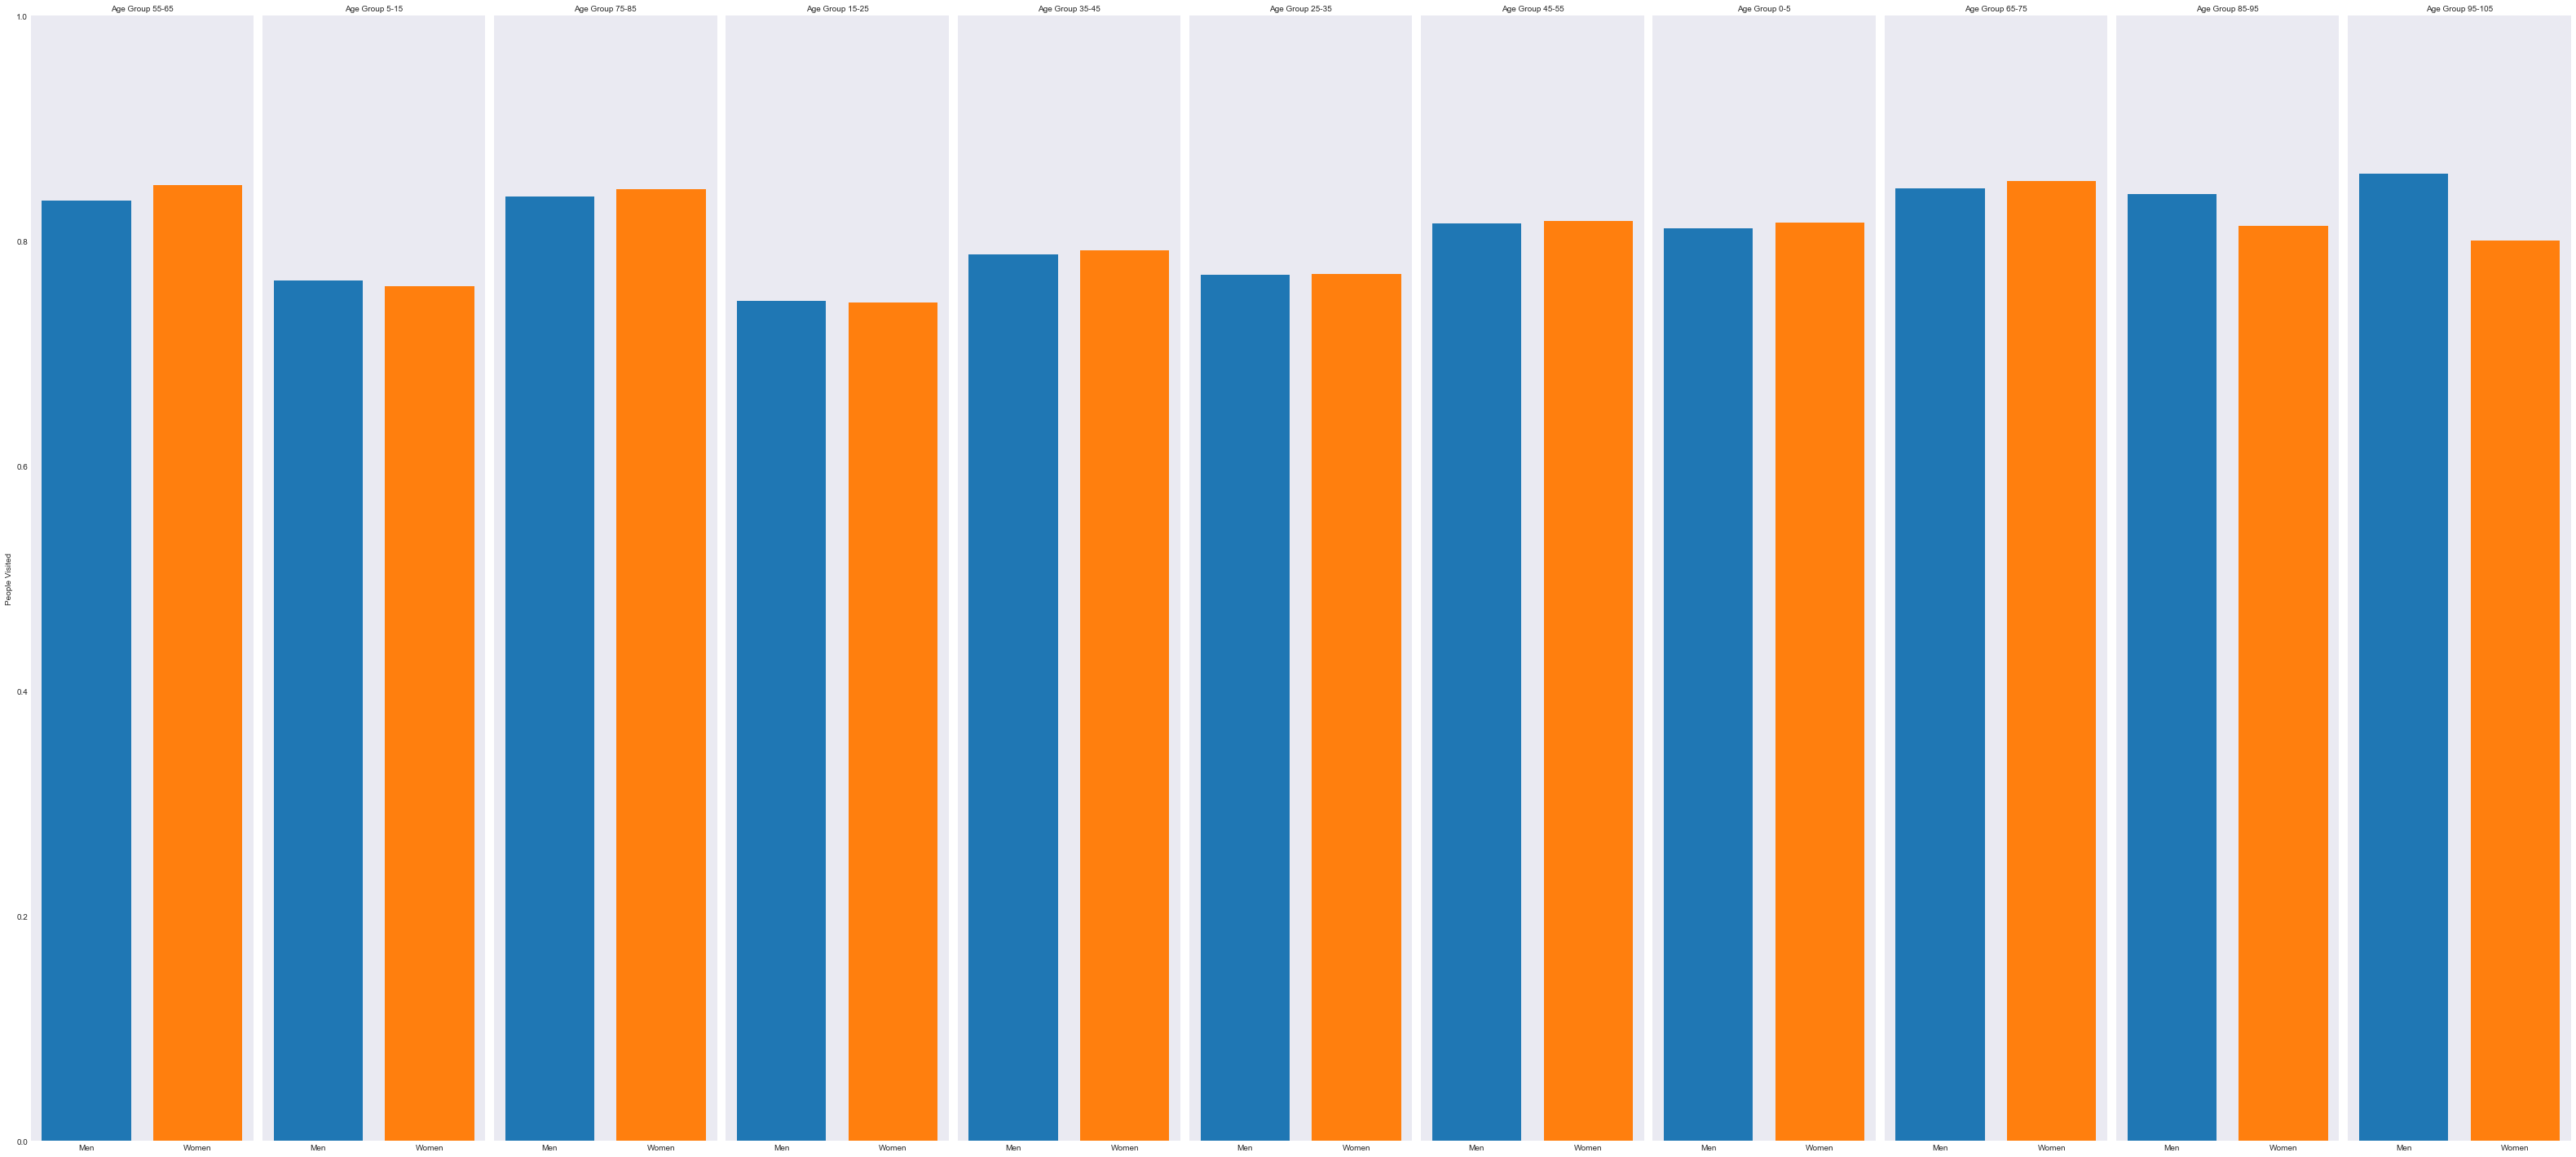

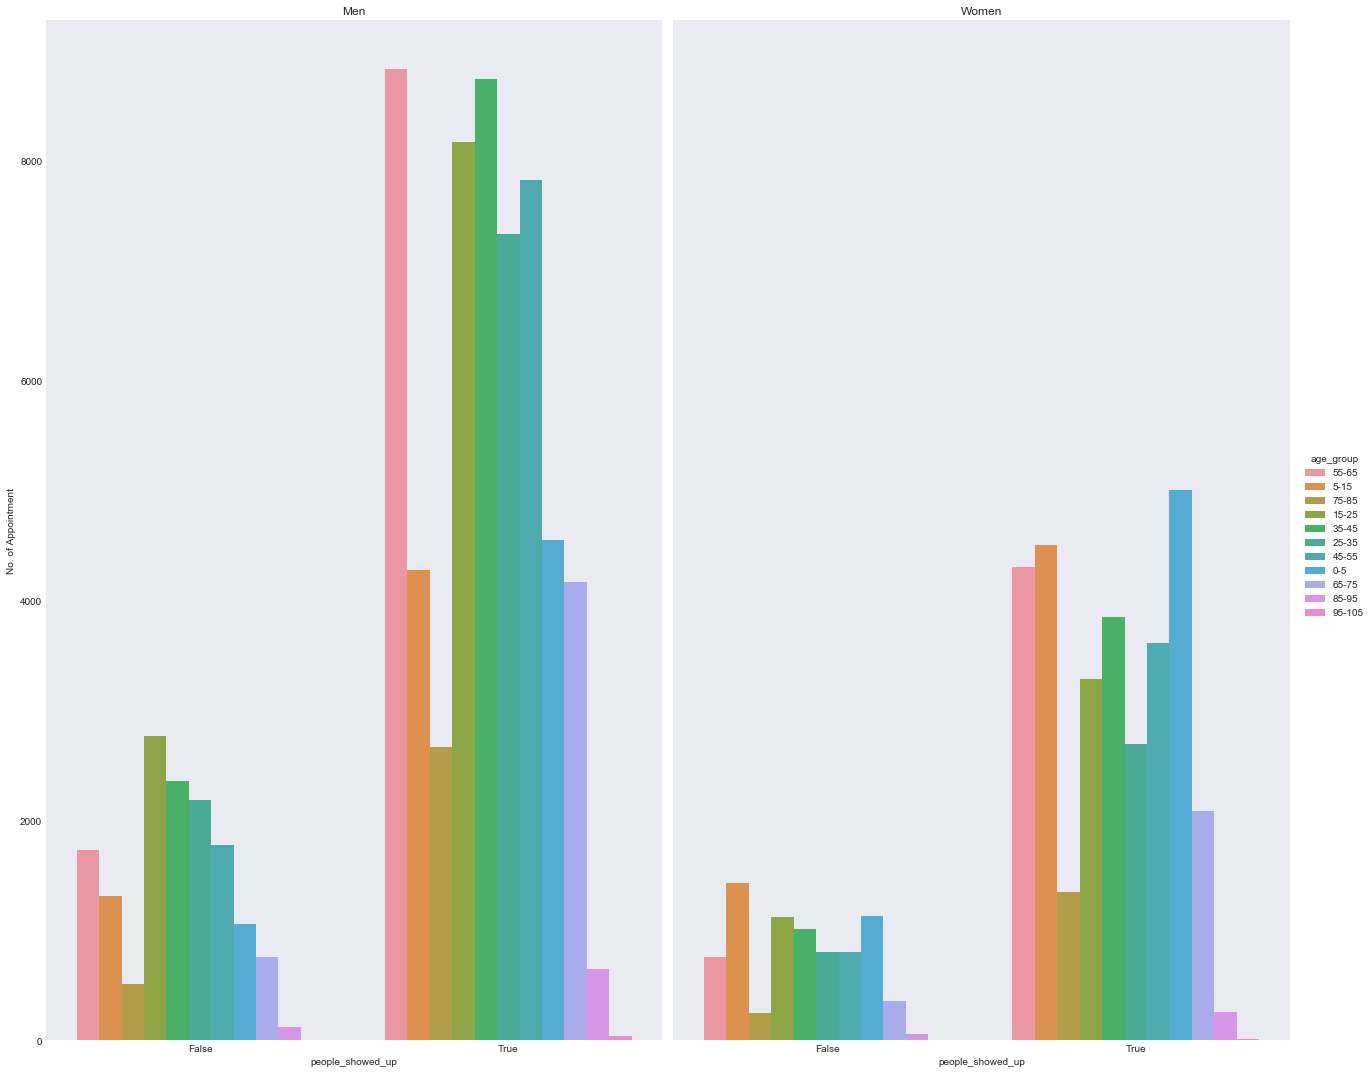

In [92]:
# Get the actual numbers grouped by Age, No-show, Gender
groupedby_visitors = clean_appointment_data.groupby(['age_group','people_showed_up','Gender']).size()

# Graph - Grouped by class, survival and sex
g = sns.factorplot(x="Gender", y="people_showed_up", col="age_group", data=clean_appointment_data, 
                   saturation=4, kind="bar", ci=None, size=20, aspect=.2)

# Fix up the labels
(g.set_axis_labels('', 'People Visited')
     .set_xticklabels(["Men", "Women"])
     .set_titles("Age Group {col_name}")
     .set(ylim=(0, 1))
     .despine(left=True, bottom=True))

# Graph - Actual count of passengers by survival, group and sex
g = sns.factorplot('people_showed_up', col='Gender', hue='age_group', data=clean_appointment_data, kind='count', size=15, aspect=.6)

# Fix up the labels
(g.set_axis_labels('people_showed_up', 'No. of Appointment')
    .set_xticklabels(["False", "True"])
    .set_titles('{col_name}')
)

titles = ['Men', 'Women']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

In [89]:
gender_df = clean_appointment_data['Gender']

### Question 2 - Did the Neighbourhood, regardless of Age and sex, determine the patients missing the Appointments ?

In [62]:
# Return the Total Number of Male And Female 


# The Average survivors and Non Survivors
mean_age_survived = clean_titanic_age_data[clean_titanic_age_data['Survived'] == True]['Age'].mean()
mean_age_died = clean_titanic_age_data[clean_titanic_age_data['Survived'] == False]['Age'].mean()

# Displaying a few Totals
print 'Total number of survivors {} \n\
Total number of non survivors {} \n\
Mean age of survivors {} \n\
Mean age of non survivors {} \n\
Oldest to survive {} \n\
Oldest to not survive {}' \
.format(number_survived, number_died, np.round(mean_age_survived), 
        np.round(mean_age_died), oldest_survivor, oldest_non_survivor)

# Graph of age of passengers across sex of those who survived
g = sns.factorplot(x="Survived", y="Age", hue='Sex', data=clean_titanic_age_data, kind="box", size=7, aspect=.8)

# Fixing the labels
(g.set_axis_labels('Suvivors', 'Age of Passengers')
    .set_xticklabels(["False", "True"])
)

NameError: name 'male_missing_age' is not defined

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!